# Exercise Chapter 11_ex 
Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, optimize
import statsmodels.formula.api as smf
import lifelines
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt
import mistat
from mistat import acceptanceSampling

# Exercise 10

In [3]:
np.random.seed(1)

N=75; lambda_=0.6; k0=15; gamma=0.95; Ns=1000

results = []
for p in (0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8):
  r = acceptanceSampling.simulateOAB(N, p, lambda_, k0, gamma, Ns)
  results.append({
      'p': p,
      'Mgamma_mean': r.mgamma.mean,
      'Mgamma_std': r.mgamma.std,
      'Reward_mean': r.reward.mean,
      'Reward_std': r.reward.std,
  })
pd.DataFrame(results)

p  Mgamma_mean  Mgamma_std  Reward_mean  Reward_std
0  0.40       22.639   11.931080      40.4016    0.904609
1  0.45       31.382   19.866758      40.3588    1.222515
2  0.50       42.608   24.492822      40.8492    2.075587
3  0.55       57.779   23.582794      42.6366    3.416241
4  0.60       66.750   18.822526      45.4380    4.143640
5  0.65       71.662   12.721154      49.1878    4.508895
6  0.70       73.924    7.576953      52.9706    4.282127
7  0.75       74.762    3.755710      57.0788    3.971714
8  0.80       74.945    1.738383      60.7050    3.518803

# Exercise 11

In [4]:
result = acceptanceSampling.optimalOAB(75, 0.6)
print(f'Case (75, 0.6): {result.max_reward:.3f}')

Case (75, 0.6): 62.447


# Exercise 19

In [5]:
def modelGoelOkumoto(t, a, b):
    return a * (1 - np.exp(-b * t))

def modelMusaOkumoto(t, phi, lam):
    return (1/phi) * np.log(lam*phi* t + 1)

def modelYamada(t, a, b):
    return a * (1 - (1+b*t)*np.exp(-b*t))

def modelInflectedSshaped(t, a, b, c):
    return a * (1 - np.exp(-b * t)) / (1 + c * np.exp(-b * t))

In [6]:
def optimizeModelFit(model, data, x, y):
    fit = optimize.curve_fit(model, data[x], data[y], method='lm')
    popt = fit[0]
    # add the fit curve to the data
    data[model.__name__] = [model(t, *popt) for t in data[x]]
    return popt
data = mistat.load_data('FAILURE_J2')
optimizeModelFit(modelGoelOkumoto, data, 'T', 'CFC') 
optimizeModelFit(modelMusaOkumoto, data, 'T', 'CFC') 
optimizeModelFit(modelYamada, data, 'T', 'CFC') 
optimizeModelFit(modelInflectedSshaped, data, 'T', 'CFC') 

array([2.26933527e+02, 5.40121092e-02, 5.96246327e+01])

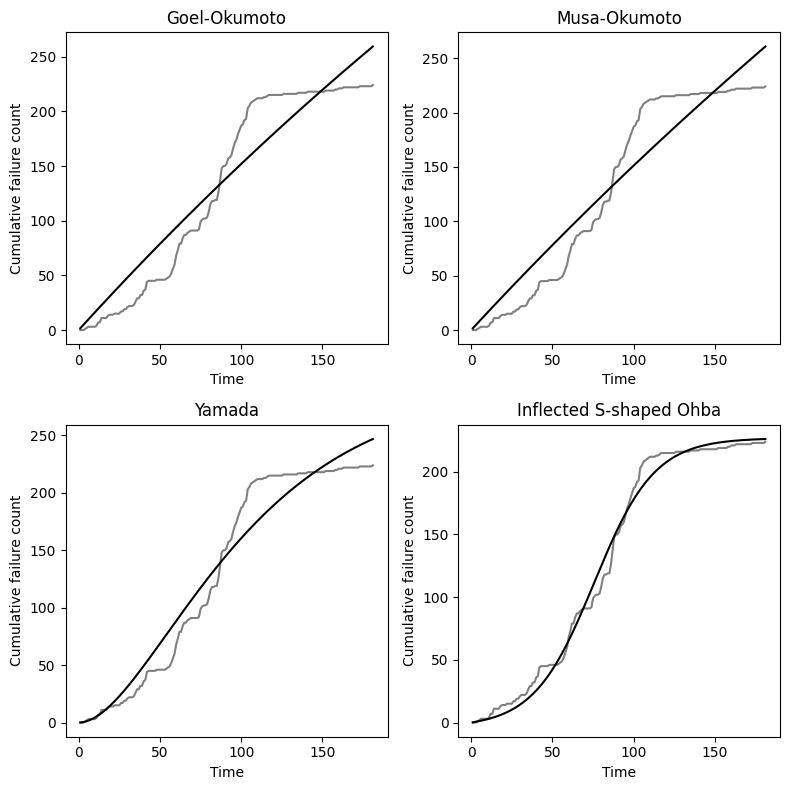

In [7]:
def plotModel(data, model, label, ax):
    ax.plot(data['T'], data['CFC'], color='grey')
    ax.plot(data['T'], data[model], color='black')
    ax.set_title(label)
    ax.set_xlabel('Time')
    ax.set_ylabel('Cumulative failure count')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[8, 8])
plotModel(data, 'modelGoelOkumoto', 'Goel-Okumoto', axes[0,0])
plotModel(data, 'modelMusaOkumoto', 'Musa-Okumoto', axes[0,1])
plotModel(data, 'modelYamada', 'Yamada', axes[1,0])
plotModel(data, 'modelInflectedSshaped', 'Inflected S-shaped Ohba', axes[1,1])
plt.tight_layout()
plt.show()

# Exercise 20

In [8]:
def optimizeModelFit(model, data, x, y, subset):
    # create the subset
    subsetX = data[x][:subset]
    subsetY = data[y][:subset]
    # fit curve to subset - a increase of maxfev is required
    fit = optimize.curve_fit(model, subsetX, subsetY, 
                             method='lm', maxfev=2000)
    popt = fit[0]
    data[f'{model.__name__} {subset}'] = [model(t, *popt) for t in data[x]]
    return popt
for subset in [25, 50, 75, 100, 125, 150]:
    optimizeModelFit(modelGoelOkumoto, data, 'T', 'CFC', subset) 
    optimizeModelFit(modelInflectedSshaped, data, 'T', 'CFC', subset)

In [9]:
def plotModel(data, subset, ax):
    ax.plot(data['T'], data['CFC'], color='grey')
    ax.plot(data['T'], data[f'modelGoelOkumoto {subset}'], color='black', linestyle=':')
    ax.plot(data['T'], data[f'modelInflectedSshaped {subset}'], color='black')
    ax.set_title(f'Subset {subset} weeks')
    ax.set_xlabel('Time')
    ax.set_ylabel('Cumulative failure count')
    ax.set_ylim(0, 250)
    ax.axvline(subset)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=[12, 8])
plotModel(data, 25, axes[0, 0])
plotModel(data, 50, axes[0, 1])
plotModel(data, 75, axes[0, 2])
plotModel(data, 100, axes[1, 0])
plotModel(data, 125, axes[1, 1])
plotModel(data, 150, axes[1, 2])
plt.tight_layout()
plt.show()

# Exercise 21

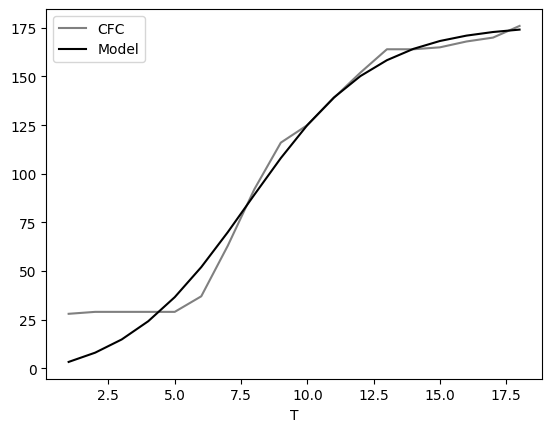

In [10]:
data = mistat.load_data('FAILURE_DS2')
fit = optimize.curve_fit(modelInflectedSshaped, data['T'], data['CFC'])
popt = fit[0]

# add the fit curve to the data and visualize
data['Model'] = [modelInflectedSshaped(t, *popt) for t in data['T']]

ax = data.plot(x='T', y='CFC', color='grey')
data.plot(x='T', y='Model', color='black', ax=ax)
plt.show()

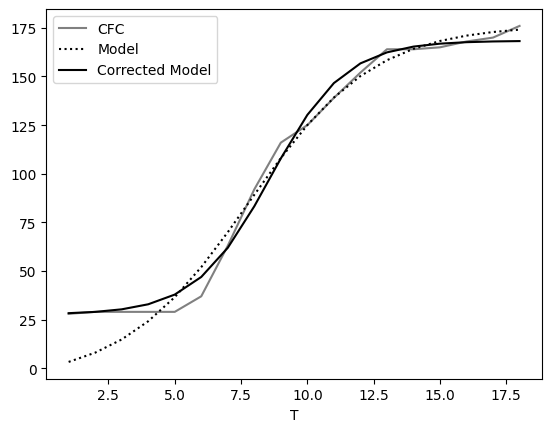

In [11]:
initial = data['CFC'][0]
def correctedModel(t, a, b, c):
    return modelInflectedSshaped(t, a, b, c) + initial

fit = optimize.curve_fit(correctedModel, data['T'], data['CFC'])
popt = fit[0]
# add the fit curve to the data and visualize
data['Corrected Model'] = [correctedModel(t, *popt) for t in data['T']]

ax = data.plot(x='T', y='CFC', color='grey')
data.plot(x='T', y='Model', color='black', ax=ax, linestyle=':')
data.plot(x='T', y='Corrected Model', color='black', ax=ax)
plt.show()